## Example for Multiple Nodes, Multiple Parameters

In [11]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    name: str
    age: str
    skills: List[str]
    store: str


In [12]:
def greeting_node(state:AgentState)->AgentState:
    """ Agent node to greet"""

    state['store'] = f"{state['name']}, Welcome to the System!"
    return state



def age_node(state:AgentState)->AgentState:
    """ Agent node to display age message"""

    state['store'] += f" You are {state['age']} years old!"
    return state


def skills_node(state:AgentState)->AgentState:
    """ Agent node to display age message"""
    
    skills_levels = ", ".join(state['skills'])
    state['store'] += f" you have skills in {skills_levels}"
    return state
    

In [13]:
graph = StateGraph(AgentState)

GREET= "Greeting"
AGE = "Age"
SKILLS= "Skills"

graph.add_node(GREET, greeting_node)
graph.add_node(AGE, age_node)
graph.add_node(SKILLS, skills_node)

graph.set_entry_point(GREET)
graph.add_edge(GREET,AGE)
graph.add_edge(AGE,SKILLS)

graph.set_finish_point(SKILLS)

app= graph.compile()


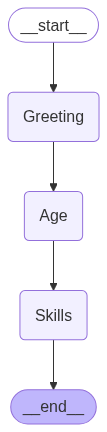

In [14]:
app

In [18]:
context = AgentState(name="Gbigbega Bakare", age=13, skills=['Python', 'Full Stack', 'Robotics Engineering','Cinematography', ' Visual Effects and Animation'])

# result= app.invoke({
#     "name": "Gbigbega",
#     "age": 16 ,
#     "skills": ['Python', 'Full Stack', 'Robotics Engineering','Cinematography', ' Visual Effects and Animation']
# })
result = app.invoke(context)


In [19]:
result.get('store')

'Gbigbega Bakare, Welcome to the System! You are 13 years old! you have skills in Python, Full Stack, Robotics Engineering, Cinematography,  Visual Effects and Animation'